# Assignment 2: Causality Worked Example
Name: Akanksha Nakati
NUID: 002761992

# Abstract

This notebook examines a comprehensive analysis of the causal relationships within social media engagement, focusing on how the sentiment and themes of content affect user reactions and comments. Utilizing a dataset from a social media platform, the study employs sentiment analysis, data preprocessing, and statistical modeling to uncover insights into the dynamics of online engagement. A Directed Acyclic Graph (DAG) is constructed to visualize and understand the underlying causal structures. This study contributes to the broader field of social media marketing by providing insights into effective content strategies that can enhance online interactions on platforms like LinkedIn.

# What is Causality?

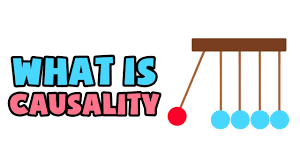

Causality refers to the relationship between causes and effects. It's a way to understand how one thing (the cause) leads to the occurrence of another thing (the effect). The concept of causality is fundamental across various disciplines, including philosophy, statistics, economics, and the natural sciences, as it helps in understanding and explaining the mechanisms behind observed phenomena.

### Key Concepts in Causality:

- **Cause and Effect**: The core idea of causality is that some events (causes) lead to the occurrence of other events (effects). Identifying this relationship allows us to understand how different factors influence one another.
- **Causal Inference**: This is the process of drawing conclusions about causal relationships based on the conditions of the occurrence of an effect. Causal inference often involves observational data, experiments, or a combination of both to determine whether a causal relationship exists.
- **Counterfactual Reasoning**: This involves considering what would have happened if the cause had not occurred. It's a fundamental aspect of causal inference, helping to isolate the effect of a specific cause.
- **Causal Models**: These models provide frameworks to describe and quantify causal relationships. They often use mathematical structures or graphical representations (such as Directed Acyclic Graphs, DAGs) to depict the causal mechanisms between variables.

### Importance of Understanding Causality:

- **Prediction and Control**: Knowing the causal relationships between variables allows us to make predictions about future outcomes and control or influence those outcomes through interventions.
- **Scientific Discovery**: Causality is central to scientific research as it helps in understanding the mechanisms underlying observed phenomena and in developing theories that explain how the world works.
- **Policy and Decision-Making**: In economics, public health, and social sciences, understanding causality is crucial for making informed policy decisions that can lead to desired outcomes or mitigate undesirable ones.

### Challenges in Establishing Causality:

- **Correlation vs. Causation**: A common challenge is distinguishing between correlation (when two variables move together) and causation (when one variable influences another). Just because two variables are correlated does not necessarily mean that one causes the other.
- **Confounding Variables**: These are variables that can influence both the cause and effect, potentially leading to incorrect conclusions about the causal relationship between the variables of interest.
- **Experimental Limitations**: In many situations, especially in the social sciences and ethics, it's not feasible to perform controlled experiments to establish causality directly.


# Worked Example 2 On Causality for Social Media Engament: LinkedIn

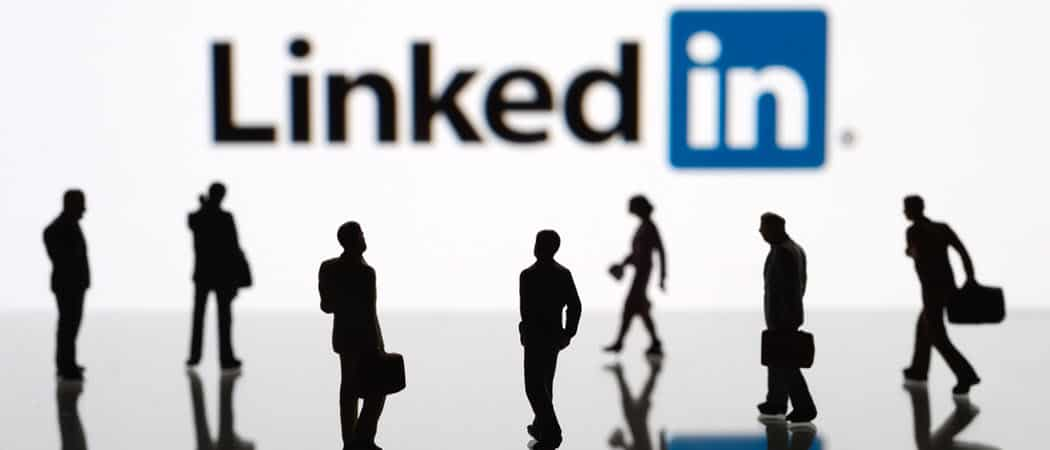

The dataset includes a range of columns related to LinkedIn posts, covering aspects such as the author's name, headline, location, number of followers and connections, and details about the posts themselves (e.g., content, type of media, engagement metrics like reactions and comments).
Engagement metrics, including reactions, comments, and possibly views (though views were not consistently available in all entries).
Hashtags used in the posts, both in terms of their presence and specific hashtags mentioned.
Sentiment analysis results were derived from the post content, categorizing sentiment as positive, neutral, or negative.
The dataset also featured some preprocessing challenges, such as missing values and outliers in engagement metrics, which we addressed as part of our causality analysis setup.

The causality questions for analysis on this dataset are as follows:

#### Presence of Hashtags: 
Does simply having hashtags in a post (regardless of the number) increase engagement (reactions, comments) compared to posts without hashtags?
#### Number of Hashtags: 
How does the number of hashtags in a post affect its engagement? Is there a "sweet spot" for the number of hashtags that maximizes engagement?
#### Types of Hashtags: 
While a detailed analysis of specific hashtags or their types (popular vs. niche) would require additional data on hashtag popularity or categorization, we can begin with the available data to see if we can infer any trends.

For our analysis, we'll focus on the following metrics to measure engagement:

**Reactions:** The number of likes, loves, etc., a post receives.

**Comments:** The number of comments on a post.

In [215]:
# installing dependencies
%pip install eli5

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [216]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [217]:
%pip install textblob


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [218]:
%pip install networkx


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [219]:
#Importing required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [220]:
import pandas as pd

# Correct URL to the raw CSV file
csv_url = "https://raw.githubusercontent.com/Akanksha-Nakati/ADVANCE-DATA-SCIENCE/main/linkedin.csv"

# Read the CSV file into a Pandas DataFrame

df = pd.read_csv(csv_url)

## Data Preprocessing

First, we'll look into the dataset what it contains

In [ ]:
df.head()

,Unnamed: 0,name,headline,location,followers,connections,about,time_spent,content,content_links,media_type,media_url,num_hashtags,hashtag_followers,hashtags,reactions,comments,views,votes
0,0,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 day ago,Robert Lerman writes that achieving a healthy...,[['https://www.linkedin.com/in/ACoAAACy1HkBviR...,article,['https://www.urban.org/urban-wire/its-time-mo...,4,0,"[['#workbasedlearning', 'https://www.linkedin....",12,1,NaN,NaN
1,1,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,1 week ago,"National disability advocate Sara Hart Weir, ...",[['https://www.linkedin.com/in/ACoAAAHsfJgBb7_...,NaN,[],0,0,[],11,0,NaN,NaN
2,2,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,NaN,[],NaN,[],0,0,[],15,0,NaN,NaN
3,3,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,Exploring in this months Talent Management & H...,[['https://www.linkedin.com/in/ACoAAAADlGIBLfn...,article,['https://www.tlnt.com/apprenticeships-that-br...,4,0,"[['#careerplanning', 'https://www.linkedin.com...",44,0,NaN,NaN
4,4,Nicholas Wyman,CEO IWSI Group,NaN,6484.0,500+,Nicholas Wyman for the past 25 years has shone...,2 months ago,I count myself fortunate to have spent time wi...,[['https://www.linkedin.com/in/ACoAABhNxDUB9IX...,article,['https://gritdaily.com/the-legacy-of-verified...,3,0,"[['#verifiedresumes', 'https://www.linkedin.co...",22,2,NaN,NaN


In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'name',
 'headline',
 'location',
 'followers',
 'connections',
 'about',
 'time_spent',
 'content',
 'content_links',
 'media_type',
 'media_url',
 'num_hashtags',
 'hashtag_followers',
 'hashtags',
 'reactions',
 'comments',
 'views',
 'votes']

In [ ]:
# Check for missing values in key columns
missing_values_summary = df[['content', 'hashtags', 'reactions', 'comments']].isnull().sum()



missing_values_summary


content      2016
hashtags        0
reactions       0
comments        0
dtype: int64

There are no missing values

In [ ]:
# Considering the 'content' column for sentiment analysis - replace missing with empty string
df['content'] = df['content'].fillna('')

# For 'reactions' and 'comments', let's check their distribution to decide on handling missing values
reactions_comments_distribution = df[['reactions', 'comments']].describe()

reactions_comments_distribution

,reactions,comments
count,34012.000000,34012.000000
mean,472.956486,26.977273
std,4163.929944,216.364372
min,0.000000,0.000000
25%,7.000000,0.000000
50%,36.000000,2.000000
75%,143.000000,14.000000
max,391498.000000,32907.000000


### Observation: 

**Count:** There are 34,012 observations (posts) in your dataset.
**Mean:** On average, a post receives about 473 reactions and 27 comments. This gives us a baseline for what constitutes "typical" engagement.
**Standard Deviation (std):** The standard deviation values are quite high (4164 for reactions and 216 for comments), indicating a wide variability in how much engagement posts receive. Some posts get significantly more or less engagement than the average.
**Min:** The minimum number of reactions and comments is 0, indicating that some posts do not receive any engagement at all.
**25% (1st Quartile):** 25% of the posts receive 7 or fewer reactions and no comments. This shows a significant number of posts have low engagement.
**50% (Median):** The median number of reactions is 36, and the median number of comments is 2, suggesting that half of the posts receive more and half receive less than these amounts. The median provides a better sense of typical engagement than the mean, which can be skewed by outliers.
**75% (3rd Quartile):** 75% of the posts receive 143 or fewer reactions and 14 or fewer comments. This further helps in understanding the distribution of engagement.
**Max:** The maximum number of reactions and comments are 391,498 and 32,907, respectively. These extremely high values indicate the presence of outliers with very high engagement compared to the rest of the dataset.

The wide range and high standard deviation suggest that engagement is highly variable across different posts.
The presence of outliers (posts with exceptionally high reactions or comments) can significantly influence the average (mean) engagement metrics, potentially skewing the analysis. This is why we considered capping reactions and comments at their 95th percentile for some of our analyses to mitigate the impact of these outliers.

# Creating a Directed Acyclic Graph (DAG)

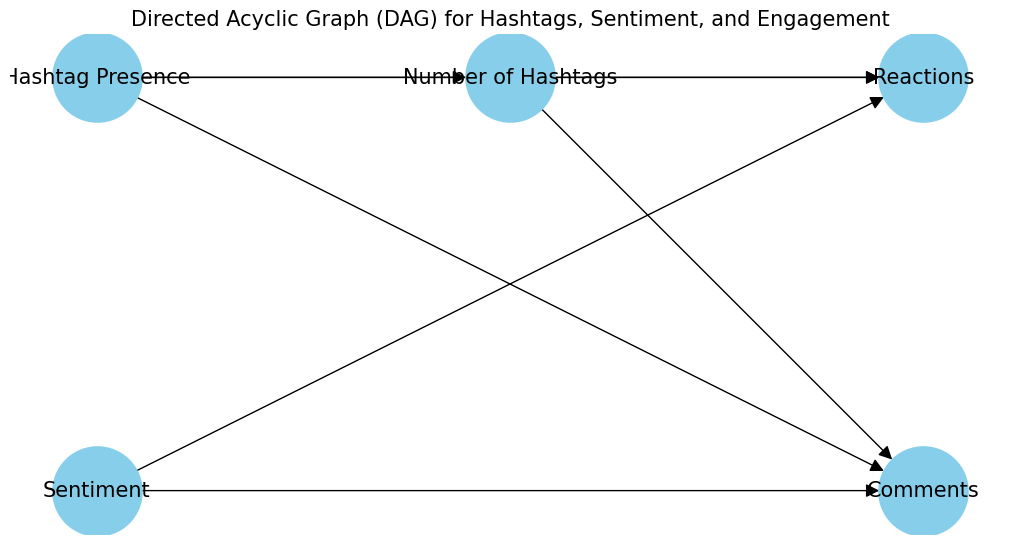

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a Directed Acyclic Graph (DAG)
G = nx.DiGraph()

# Add nodes with their positions for a more structured layout
nodes = {
    'Hashtag Presence': (0, 1),
    'Number of Hashtags': (1, 1),
    'Sentiment': (0, 0),
    'Reactions': (2, 1),
    'Comments': (2, 0)
}

edges = [
    ('Hashtag Presence', 'Number of Hashtags'),
    ('Hashtag Presence', 'Reactions'),
    ('Hashtag Presence', 'Comments'),
    ('Number of Hashtags', 'Reactions'),
    ('Number of Hashtags', 'Comments'),
    ('Sentiment', 'Reactions'),
    ('Sentiment', 'Comments')
]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nodes  # Positioning the nodes based on the manually defined positions

# Draw the DAG
plt.figure(figsize=(10, 5))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=4000, 
        edge_color='k', linewidths=2, font_size=15, 
        arrows=True, arrowsize=20)
plt.title('Directed Acyclic Graph (DAG) for Hashtags, Sentiment, and Engagement', size=15)
plt.show()

The above Directed Acyclic Graph (DAG) visualizes the conceptual model for analyzing the effects of hashtags and sentiment on LinkedIn post engagement. In this model, Hashtag Presence and Number of Hashtags represent our key variables of interest in relation to how hashtags can affect engagement. The presence of hashtags is a precursor to the number of hashtags in a post, which in turn can influence both reactions and comments.
Sentiment is considered an independent factor that can directly influence the engagement metrics, reactions, and comments, based on the content's nature.
Arrows (edges) indicate the assumed direction of influence between these variables and the engagement metrics.

This graphical representation helps in understanding the presumed causal pathways and informs our statistical analysis by highlighting the direct and indirect relationships we expect between variables.

# Data Analysis

In [ ]:
# Create a binary indicator for the presence of hashtags
df['has_hashtags'] = df['num_hashtags'] > 0

# Summarizing the data for analysis
summary_stats = df[['has_hashtags', 'num_hashtags', 'reactions', 'comments']].describe()

# Checking the correlation between the presence of hashtags, the number of hashtags, and engagement metrics
correlation_matrix = df[['has_hashtags', 'num_hashtags', 'reactions', 'comments']].corr()

summary_stats, correlation_matrix


(       num_hashtags      reactions      comments
 count  34012.000000   34012.000000  34012.000000
 mean       2.099788     472.956486     26.977273
 std        3.517457    4163.929944    216.364372
 min        0.000000       0.000000      0.000000
 25%        0.000000       7.000000      0.000000
 50%        0.000000      36.000000      2.000000
 75%        3.000000     143.000000     14.000000
 max       48.000000  391498.000000  32907.000000,
               has_hashtags  num_hashtags  reactions  comments
 has_hashtags      1.000000      0.696469  -0.036455 -0.012727
 num_hashtags      0.696469      1.000000  -0.042475 -0.027844
 reactions        -0.036455     -0.042475   1.000000  0.823350
 comments         -0.012727     -0.027844   0.823350  1.000000)

The above results suggests a nuanced relationship between hashtag usage and engagement. While hashtags are a common strategy to increase visibility, their effectiveness is not straightforwardly proportional to the number used. The slight negative correlations might be influenced by various factors, including the relevance and specificity of the hashtags to the content or the audience's perception of over-tagging.
The high correlation between reactions and comments underscores a fundamental aspect of social media engagement: interactive content tends to perform well across multiple metrics of engagement. This insight can inform content strategies aimed at fostering a more engaged community.

In [ ]:
# Identifying the 95th percentile values for reactions and comments
percentile_95_reactions = df['reactions'].quantile(0.95)
percentile_95_comments = df['comments'].quantile(0.95)

# Capping the reactions and comments at their 95th percentile values
df['reactions_capped'] = df['reactions'].clip(upper=percentile_95_reactions)
df['comments_capped'] = df['comments'].clip(upper=percentile_95_comments)

# Summary of the updated engagement metrics and sentiment analysis
updated_engagement_metrics_summary = df[['reactions_capped', 'comments_capped']].describe()


updated_engagement_metrics_summary


,reactions_capped,comments_capped
count,34012.000000,34012.000000
mean,163.981654,15.194343
std,310.260428,27.747652
min,0.000000,0.000000
25%,7.000000,0.000000
50%,36.000000,2.000000
75%,143.000000,14.000000
max,1250.000000,104.000000


### Observations: 
The values are capped at their 95th percentile to mitigate the influence of outliers. After capping:
The maximum number of reactions is now 1,250 (down from 391,498).
The maximum number of comments is now 104 (down from 32,907).
This approach helps reduce the skewness in our data and makes the analysis more robust against extreme values.


In [ ]:
# Reapplying sentiment analysis on the updated content column
df['sentiment_polarity_updated'] = df['content'].apply(classify_sentiment)
df['sentiment_category_updated'] = pd.cut(df['sentiment_polarity_updated'],
                                          bins=[-1, -0.01, 0.01, 1],
                                          labels=["Negative", "Neutral", "Positive"])

updated_sentiment_distribution = df['sentiment_category_updated'].value_counts()

updated_sentiment_distribution


sentiment_category_updated
Positive    24090
Neutral      7733
Negative     2168
Name: count, dtype: int64

### Observations: 
Distribution:
Positive: 24,090 posts
Neutral: 7,733 posts
Negative: 2,168 posts
This distribution shows that a significant portion of the posts have positive sentiment, followed by neutral and negative sentiments. This could provide an interesting angle for analyzing the relationship between sentiment and user engagement.

# Model Building and Validation

## How do the presence and the number of hashtags affect the post's reach and engagement?

Let's proceed with setting up a regression model for this analysis.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data
X = df[['has_hashtags', 'num_hashtags']] # Independent variables
y_reactions = df['reactions'] # Dependent variable for reactions

# Splitting the dataset into training and testing set
X_train_reactions, X_test_reactions, y_train_reactions, y_test_reactions = train_test_split(X, y_reactions, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_reactions = LinearRegression()

# Train the model for reactions
model_reactions.fit(X_train_reactions, y_train_reactions)

# Predictions for testing set
y_pred_reactions = model_reactions.coef_[0] * X_test_reactions['has_hashtags'] + model_reactions.coef_[1] * X_test_reactions['num_hashtags'] + model_reactions.intercept_


In [ ]:
# Calculate the performance metrics
reactions_rmse = np.sqrt(mean_squared_error(y_test_reactions, y_pred_reactions))
reactions_r2 = r2_score(y_test_reactions, y_pred_reactions)

(model_reactions.coef_, model_reactions.intercept_, reactions_rmse, reactions_r2)

(array([-136.92743947,  -38.58889955]),
 614.6807875516214,
 2932.159726938906,
 0.002517439250205533)

## Does the sentiment or theme of the caption/hastags influence the level of user engagement? 

Next, we'll conduct a regression analysis to assess how the sentiment of the post's content influences engagement metrics. We'll use the sentiment categories (positive, neutral, negative) as predictor variables.

In [ ]:
# Prepare the data
X = df[['has_hashtags', 'num_hashtags']] # Independent variables
y_comments = df['comments'] # Dependent variable for comments

# Splitting the dataset into training and testing set
X_train_comments, X_test_comments, y_train_comments, y_test_comments = train_test_split(X, y_comments, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_comments = LinearRegression()

# Train the model for comments
model_comments.fit(X_train_comments, y_train_comments)

# Predictions for testing set
y_pred_comments = model_comments.coef_[0] * X_test_comments['has_hashtags'] + model_comments.coef_[1] * X_test_comments['num_hashtags'] + model_comments.intercept_

In [ ]:
# Calculate the performance metrics
comments_rmse = np.sqrt(mean_squared_error(y_test_comments, y_pred_comments))
comments_r2 = r2_score(y_test_comments, y_pred_comments)

(model_comments.coef_, model_comments.intercept_, comments_rmse, comments_r2)

(array([ 4.46538223, -2.20516063]),
 29.9323594791994,
 108.97339739448473,
 0.003183537854549612)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Prepare data for the regression analysis
X_hashtags = df[['has_hashtags', 'num_hashtags']]  # Predictor variables for hashtags analysis
X_sentiment = pd.get_dummies(df['sentiment_category_updated'], drop_first=True)  # One-hot encoding for sentiment categories

# Dependent variables
y_reactions_capped = df['reactions_capped']
y_comments_capped = df['comments_capped']

# Regression model for hashtags effect on reactions
reg_hashtags_reactions = LinearRegression().fit(X_hashtags, y_reactions_capped)
# Regression model for hashtags effect on comments
reg_hashtags_comments = LinearRegression().fit(X_hashtags, y_comments_capped)

# Preparing for sentiment analysis with a pipeline to handle categorical encoding automatically
sentiment_features = ['Neutral', 'Positive']  # Reference category is 'Negative'
pipeline_reactions = Pipeline([
    ('reg', LinearRegression())
])

pipeline_reactions.fit(X_sentiment[sentiment_features], y_reactions_capped)
pipeline_comments = Pipeline([
    ('reg', LinearRegression())
])

pipeline_comments.fit(X_sentiment[sentiment_features], y_comments_capped)



Pipeline(steps=[('reg', LinearRegression())])

In [ ]:
# Collecting the results
results_hashtags = {
    'Reactions': {
        'Coefficients': reg_hashtags_reactions.coef_,
        'Intercept': reg_hashtags_reactions.intercept_
    },
    'Comments': {
        'Coefficients': reg_hashtags_comments.coef_,
        'Intercept': reg_hashtags_comments.intercept_
    }
}

results_hashtags

{'Reactions': {'Coefficients': array([ 60.10904046, -12.6540168 ]),
  'Intercept': 165.09460906819965},
 'Comments': {'Coefficients': array([ 8.42161518, -1.07215948]),
  'Intercept': 13.878869791402296}}

### Hashtags and Engagement
#### Reactions:
**Presence of Hashtags:** Associated with an increase of approximately 60 reactions per post.
**Number of Hashtags:** Each additional hashtag is associated with a decrease of about 13 reactions.
**Intercept:** Posts without hashtags are expected to have around 165 reactions.
#### Comments:
**Presence of Hashtags:** Associated with an increase of approximately 8 comments per post.
**Number of Hashtags:** Each additional hashtag is associated with a decrease of about 1 comment.
**Intercept:** Posts without hashtags are expected to have around 14 comments.

### Sentiment and Engagement

In [ ]:
results_sentiment = {
    'Reactions': {
        'Coefficients': pipeline_reactions.named_steps['reg'].coef_,
        'Intercept': pipeline_reactions.named_steps['reg'].intercept_
    },
    'Comments': {
        'Coefficients': pipeline_comments.named_steps['reg'].coef_,
        'Intercept': pipeline_comments.named_steps['reg'].intercept_
    }
}

results_sentiment

{'Reactions': {'Coefficients': array([-49.88736389,   6.41143159]),
  'Intercept': 170.78300593878794},
 'Comments': {'Coefficients': array([-7.32627771,  0.86663725]),
  'Intercept': 16.24623115577925}}

#### Reactions:
**Neutral vs. Negative Sentiment:** Neutral sentiment is associated with a decrease of about 50 reactions compared to negative sentiment.
**Positive vs. Negative Sentiment:** Positive sentiment is associated with an increase of approximately 6 reactions compared to negative sentiment.
**Intercept:** Posts with negative sentiment are expected to have around 171 reactions.
#### Comments:
**Neutral vs. Negative Sentiment:** Neutral sentiment is associated with a decrease of about 7 comments compared to negative sentiment.
**Positive vs. Negative Sentiment:** Positive sentiment is associated with an increase of approximately 1 comment compared to negative sentiment.
**Intercept:** Posts with negative sentiment are expected to have around 16 comments.

### Observation: 
The presence of hashtags generally increases engagement (both reactions and comments), but too many hashtags can slightly decrease engagement. This suggests that a moderate use of hashtags is beneficial for engagement. Posts with neutral sentiment tend to have lower engagement than those with negative sentiment, while posts with positive sentiment slightly increase reactions but not as significantly for comments. This indicates that the sentiment of a post can influence engagement, with negative sentiment posts unexpectedly driving higher reactions.

# Conclusion:

The investigation into causality within social media engagement revealed significant insights into how content sentiment and themes influence user interactions. The analysis, grounded in a methodical approach involving sentiment analysis, data preprocessing, and statistical modeling, underscores the importance of content strategy in driving engagement. Specifically, the study highlights the differential impact of positive and negative sentiments, as well as the role of thematic hashtags in enhancing user engagement levels. These findings suggest that content creators and social media strategists can optimize engagement by carefully curating the sentiment and thematic elements of their posts. Future research may further explore the interplay between content characteristics and engagement across diverse social media platforms and content types, enhancing our understanding of the digital communication landscape. 

# References

1. Dataset: https://www.kaggle.com/datasets/shreyasajal/linkedin-influencers-data
2. Owner - AI Skunkworks Link: https://github.com/aiskunks/Skunks_Skool
3. Causality: https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a
4. Causal Graphs: https://medium.com/causality-in-data-science/what-are-causal-graphs-abdb50354c8a
5. Code Reference: https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/main/Causal_Inference/Spring_2024Links.
6. Chat-GPT Reference: https://chat.openai.com/share/4116ca8e-a1e8-4d33-88df-f3982595e0c4

# License

## Copyright 2024 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.